# t-SNE

題材: [scikit-learnでt-SNE散布図を描いてみる](http://inaz2.hatenablog.com/entry/2017/01/24/211331)

In [1]:
# 必要パッケージのインポートと不思議なおまじない

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import sklearn as sl
import pandas as pd
import seaborn as sns

%matplotlib inline

##  PCAとt-SNEを比較する

### MNISTデータの準備

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()

In [4]:
pd.DataFrame(digits.data)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [19]:
pd.DataFrame(digits.target)

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


### PCAの場合

In [5]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(digits.data)

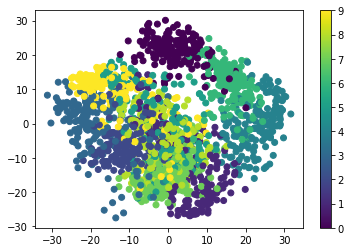

In [6]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target)
plt.colorbar()

### t-SNEの場合

In [8]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(digits.data)

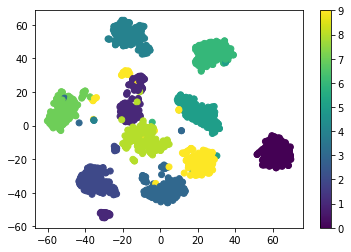

In [9]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target)
plt.colorbar()